<a href="https://colab.research.google.com/github/anshamsp123/Plant-Disease-Classification-Using-CNN/blob/main/DL_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DL Lab Assignment 03,
Name: Ansh Sharma,
Class: TY-CSE(AIML)-A,
Batch: 03,
Roll Number: 09.
Colab link: https://colab.research.google.com/drive/1u-ho-Y8LDJ0ro-0agSKmyRpdwa6jms_f?usp=sharing

In [ ]:
!pip install tensorflow tensorflow-datasets

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
(ds_train, ds_test), ds_info = tfds.load(
    'plant_village',
    split=['train[:20%]', 'train[20%:25%]'],  # small subset
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.K3095J_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [ ]:
print("Number of classes:", ds_info.features['label'].num_classes)

Number of classes: 38


In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

class_names = ds_info.features['label'].names

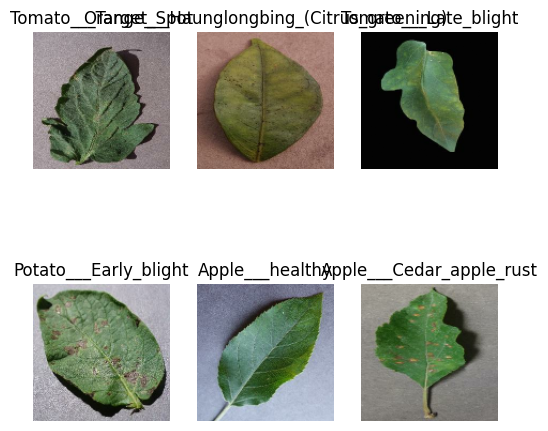

In [ ]:
plt.figure(figsize=(6,6))
for images, labels in ds_train.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397,222 (28.22 MB)

 Trainable params: 7,397,222 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10
)

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 328s 956ms/step - accuracy: 0.2330 - loss: 3.0900 - val_accuracy: 0.5208 - val_loss: 1.6796
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 375s 937ms/step - accuracy: 0.4981 - loss: 1.8260 - val_accuracy: 0.6534 - val_loss: 1.1818
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 321s 935ms/step - accuracy: 0.5849 - loss: 1.4457 - val_accuracy: 0.6832 - val_loss: 1.0504
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 319s 938ms/step - accuracy: 0.6391 - loss: 1.2009 - val_accuracy: 0.7282 - val_loss: 0.9019
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 332s 977ms/step - accuracy: 0.6783 - loss: 1.0435 - val_accuracy: 0.7521 - val_loss: 0.8117
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 320s 940ms/step - accuracy: 0.7018 - loss: 0.9410 - val_accuracy: 0.7716 - val_loss: 0.7347
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 312s 918ms/step - accuracy: 0.7281 - loss: 0.8358 - val_accuracy: 0.7687 - val_loss: 0.7759
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 321s 943ms/step - accuracy: 0.7555 -

In [ ]:
test_loss, test_accuracy = model.evaluate(ds_test)
print("Test Accuracy:", test_accuracy)

85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 273ms/step - accuracy: 0.7868 - loss: 0.7094
Test Accuracy: 0.7830570936203003


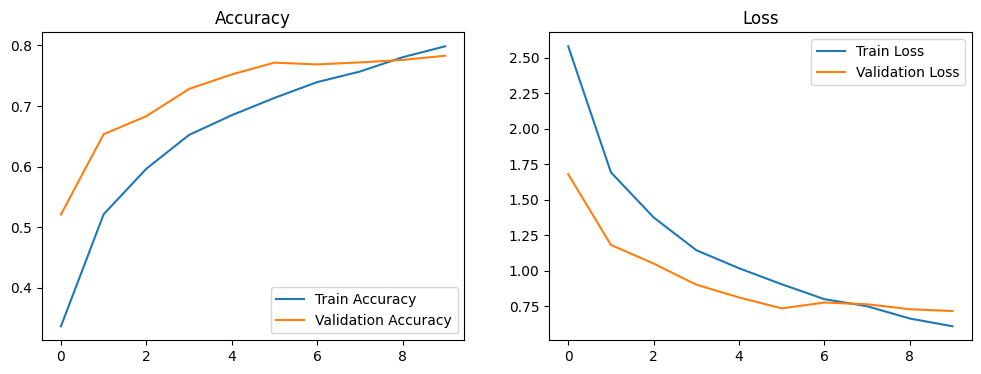

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Image 2026-01-28 at 8.38.32 PM.jpeg to WhatsApp Image 2026-01-28 at 8.38.32 PM.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted Disease: Pepper,_bell___healthy


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

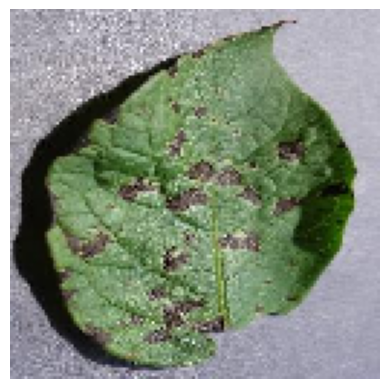

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print("Predicted Disease:", predicted_class)

plt.imshow(img)
plt.axis("off")